<a href="https://colab.research.google.com/github/cbarca871/Laguardia-Project/blob/main/NYPDARRESTDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving NYPD_Arrest_Data__Year_to_Date__20250407.xlsx to NYPD_Arrest_Data__Year_to_Date__20250407.xlsx


In [2]:
import pandas as pd
import io

df = pd.read_excel(io.BytesIO(uploaded['NYPD_Arrest_Data__Year_to_Date__20250407.xlsx']))
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281369711,2024-01-30,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,25,0,25-44,M,BLACK,1000558,231080,40.800930,-73.941098,POINT (-73.9410982410066 40.8009303727402)
1,284561406,2024-03-30,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,44,0,25-44,M,BLACK,1004297,242846,40.833209,-73.927554,POINT (-73.927554 40.833209)
2,284896016,2024-04-06,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,19,0,25-44,M,BLACK,997304,222853,40.778348,-73.952863,POINT (-73.952863 40.778348)
3,285569016,2024-04-18,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,69,0,25-44,M,BLACK,1010576,175628,40.648698,-73.905128,POINT (-73.905128 40.648698)
4,287308954,2024-05-22,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,18,0,18-24,M,WHITE,991530,217373,40.763313,-73.973717,POINT (-73.973717 40.763313)


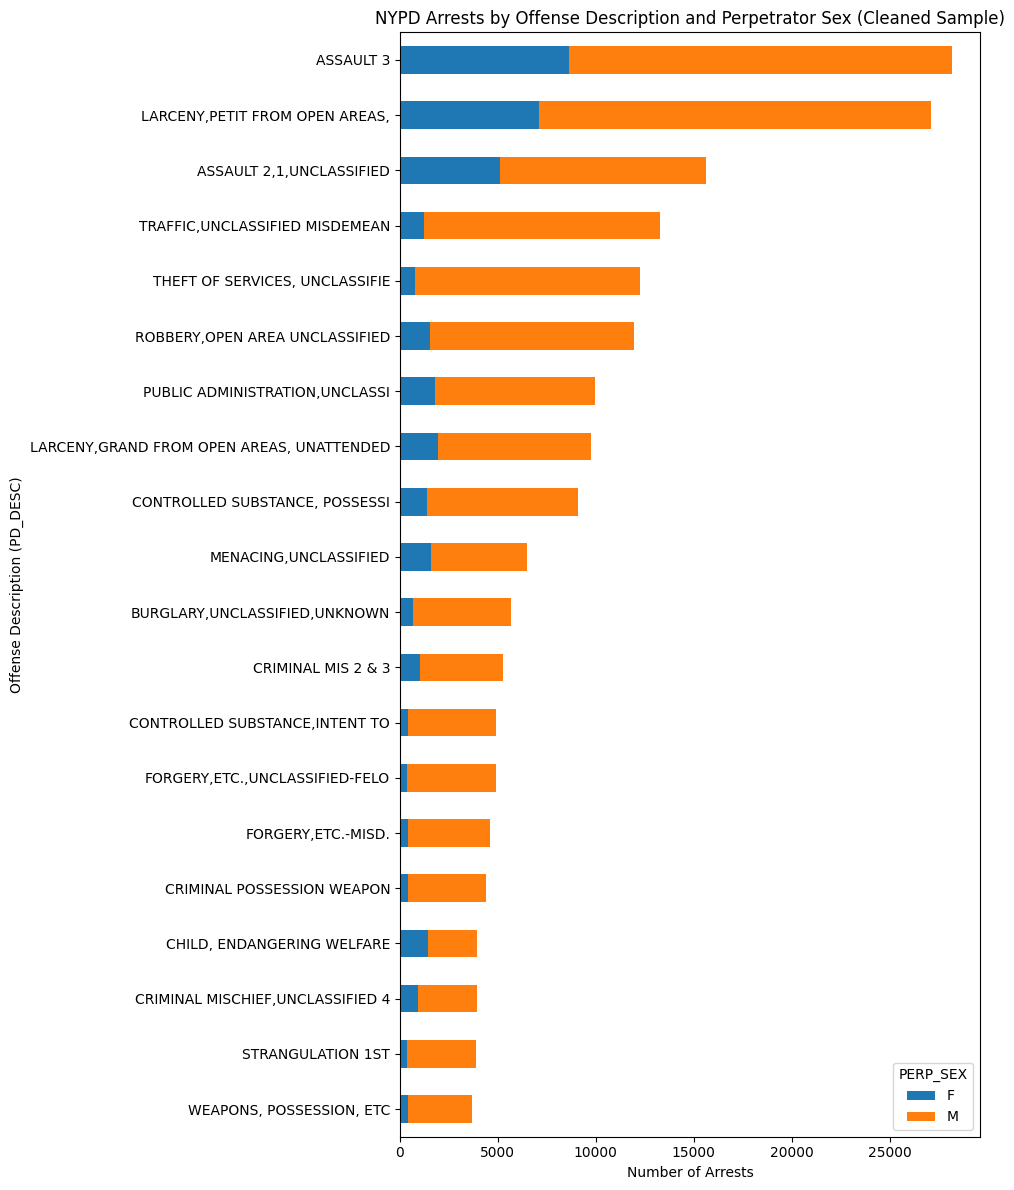

Conclusion: Across the top 20 offense Males account for the majority of arrests specifically in violent crimes such as Assault 3rd, Criminal Mischief and Strangulation 1st. Females were more involved in non-violent and economically driven crimes such as Petit Larceny, Theft of Services, and Forgery.


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by PD_DESC and PERP_SEX
grouped = df.groupby(['PD_DESC', 'PERP_SEX']).size().reset_index(name='Arrest_Count')

# Data cleaning: drop rows with missing values in PD_DESC or PERP_SEX
df_cleaned = df[['PD_DESC', 'PERP_SEX']].dropna()
df_cleaned = df_cleaned[df_cleaned['PERP_SEX'].isin(['M', 'F'])]

# Group by PD_DESC and PERP_SEX after cleaning
grouped_cleaned = df_cleaned.groupby(['PD_DESC', 'PERP_SEX']).size().reset_index(name='Arrest_Count')

# Pivot for visualization
pivot_cleaned = grouped_cleaned.pivot(index='PD_DESC', columns='PERP_SEX', values='Arrest_Count').fillna(0)

# Sort by total arrests for better visualization
pivot_cleaned['Total'] = pivot_cleaned.sum(axis=1)
pivot_cleaned = pivot_cleaned.sort_values('Total', ascending=False).drop(columns='Total')

# Plot the top 20 offense descriptions by arrest count and perpetrator sex
pivot_cleaned.head(20).plot(kind='barh', stacked=True, figsize=(10, 12))
plt.xlabel("Number of Arrests")
plt.ylabel("Offense Description (PD_DESC)")
plt.title("NYPD Arrests by Offense Description and Perpetrator Sex (Cleaned Sample)")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

# Conclusion
print("Conclusion: Across the top 20 offense Males account for the majority of arrests specifically in violent crimes such as Assault 3rd, Criminal Mischief and Strangulation 1st. Females were more involved in non-violent and economically driven crimes such as Petit Larceny, Theft of Services, and Forgery.")